 # Assignment 18:Forecasting (Airlines+Data.xlsx)


In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import itertools
import statsmodels.api as sm

In [13]:
air_d = pd.read_excel('Airlines+Data.xlsx',header=0, index_col=0, parse_dates=True)

air_d

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


# EDA & Data Preprocessing

In [16]:
air_d.shape

(96, 1)

In [17]:
air_d.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [18]:
air_d.isna().sum()

Passengers    0
dtype: int64

# Visualisation

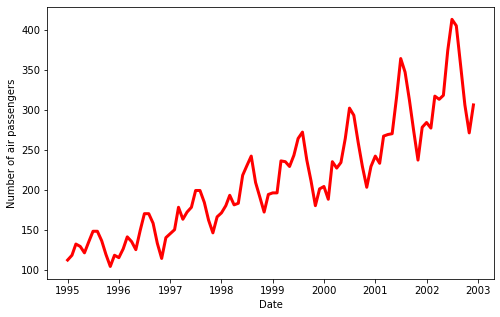

In [19]:
# Lineplot for Passengers
plt.figure(figsize=(8,5))
plt.xlabel("Date")
plt.ylabel("Number of air passengers")
plt.plot(air_d['Passengers'], color = 'red', linewidth=3)

<AxesSubplot:>

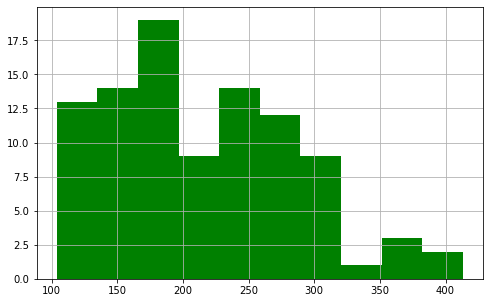

In [20]:
# Histogram
air_d['Passengers'].hist(figsize=(8,5), color = 'g')

<AxesSubplot:ylabel='Density'>

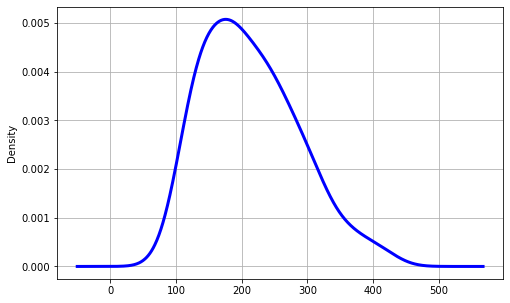

In [21]:
# Density Plot
air_d['Passengers'].plot(kind = 'kde',linewidth=3 ,color = 'b', figsize=(8,5), grid= True)

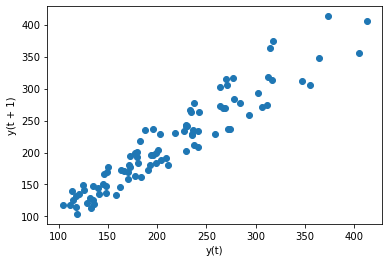

In [26]:
# Lagplot
from pandas.plotting import lag_plot

lag_plot(air_d['Passengers'])

plt.show()

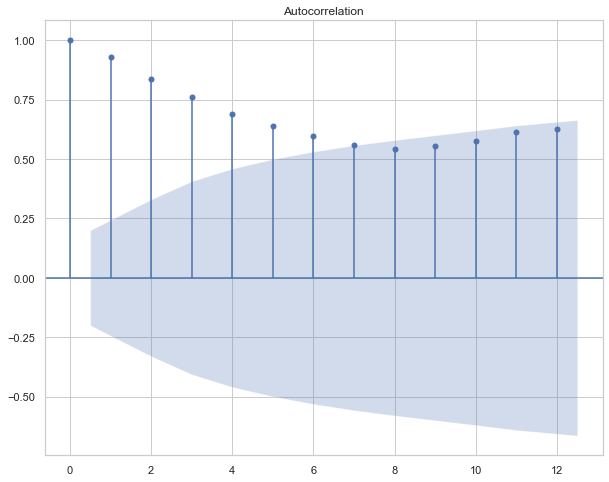

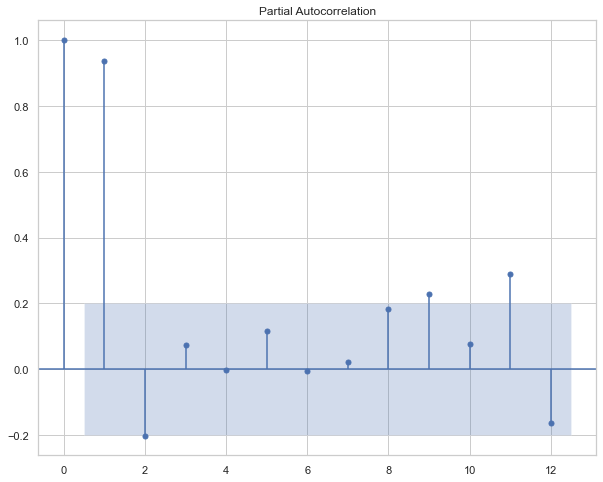

In [27]:
# create an autocorrelation plot

import statsmodels.graphics.tsaplots as tsa_plots
sns.set(rc={'figure.figsize':(10,8)}, style = 'whitegrid')
tsa_plots.plot_acf(air_d.Passengers,lags=12)
tsa_plots.plot_pacf(air_d.Passengers,lags=12)
plt.show()

# Moving Average Method

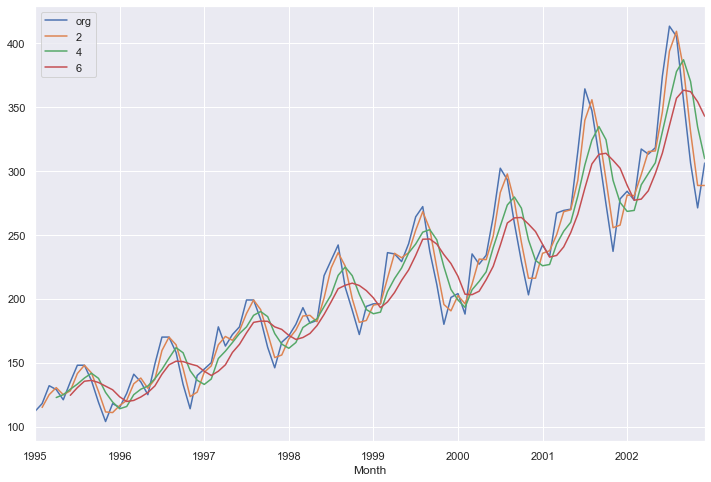

In [28]:
sns.set(rc={'figure.figsize':(12,8)}, style = 'darkgrid')
air_d.Passengers.plot(label="org")
for i in range(2,8,2):
    air_d["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

# Time series decomposition plot

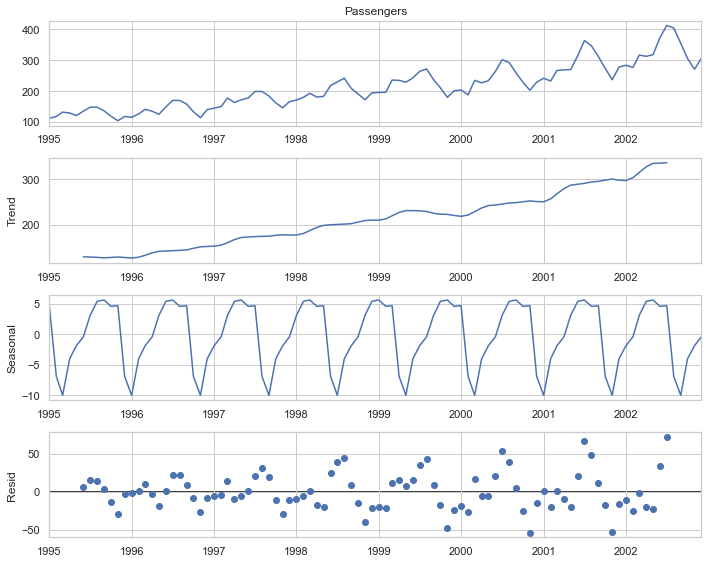

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose


sns.set(rc={'figure.figsize':(10,8)}, style = 'whitegrid')
decompose_ts_add = seasonal_decompose(air_d.Passengers,period=10)
decompose_ts_add.plot()
plt.show()

# ARIMA Model

In [34]:
# separate out a validation dataset
split_point = len(air_d) - 10
dataset, validation = air_d[0:split_point], air_d[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_excel('dataset.xlsx', header=False)
validation.to_excel('validation.xlsx', header=False)

Dataset 86, Validation 10


**Persistence/ Base model**

In [3]:
# separate out a validation dataset
split_point = len(data) - 10
dataset, validation = data[0:split_point], data[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_excel('dataset.xlsx', header=False)
validation.to_excel('validation.xlsx', header=False)

Dataset 86, Validation 10


In [4]:
# evaluate a persistance model
from sklearn.metrics import mean_squared_error
from math import sqrt

In [5]:
# load data
train = pd.read_excel('dataset.xlsx', header = None, index_col = 0 , parse_dates = True, squeeze = True)
# Prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X)*0.50)
train,test = X[0:train_size], X[train_size:]

In [6]:
# data validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# Observations
    obs = test[i]
    print('> Prdicted = %.3f, Expected = %.3f' % (yhat,obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

> Prdicted = 230.000, Expected = 242.000
> Prdicted = 230.000, Expected = 209.000
> Prdicted = 230.000, Expected = 191.000
> Prdicted = 230.000, Expected = 172.000
> Prdicted = 230.000, Expected = 194.000
> Prdicted = 230.000, Expected = 196.000
> Prdicted = 230.000, Expected = 196.000
> Prdicted = 230.000, Expected = 236.000
> Prdicted = 230.000, Expected = 235.000
> Prdicted = 230.000, Expected = 229.000
> Prdicted = 230.000, Expected = 243.000
> Prdicted = 230.000, Expected = 264.000
> Prdicted = 230.000, Expected = 272.000
> Prdicted = 230.000, Expected = 237.000
> Prdicted = 230.000, Expected = 211.000
> Prdicted = 230.000, Expected = 180.000
> Prdicted = 230.000, Expected = 201.000
> Prdicted = 230.000, Expected = 204.000
> Prdicted = 230.000, Expected = 188.000
> Prdicted = 230.000, Expected = 235.000
> Prdicted = 230.000, Expected = 227.000
> Prdicted = 230.000, Expected = 234.000
> Prdicted = 230.000, Expected = 264.000
> Prdicted = 230.000, Expected = 302.000
> Prdicted = 230

**ARIMA Hyperameters**

In [7]:
# grid search ARIMA parameters for a time series
from statsmodels.tsa.arima_model import ARIMA

In [8]:
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [9]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [10]:
# load dataser
train= pd.read_excel('dataset.xlsx', header = None , index_col =0, parse_dates = True, squeeze =True)
# evaluate parameters
p_values = range(0,3)
d_values = range(0,3)
q_values = range(0,3)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=78.563
ARIMA(0, 0, 1) RMSE=44.789
ARIMA(0, 1, 0) RMSE=25.903
ARIMA(0, 1, 1) RMSE=25.355
ARIMA(0, 1, 2) RMSE=27.772
ARIMA(0, 2, 0) RMSE=32.474
ARIMA(0, 2, 1) RMSE=26.640
ARIMA(0, 2, 2) RMSE=25.942
ARIMA(1, 0, 0) RMSE=26.036
ARIMA(1, 0, 1) RMSE=25.282
ARIMA(1, 0, 2) RMSE=455.575
ARIMA(1, 1, 0) RMSE=25.679
ARIMA(1, 2, 0) RMSE=31.603
ARIMA(2, 0, 0) RMSE=25.620
ARIMA(2, 1, 0) RMSE=25.467
ARIMA(2, 2, 0) RMSE=30.414
Best ARIMA(1, 0, 1) RMSE=25.282


# Build model based on the optimized values

In [43]:
# load data
train = pd.read_excel('dataset.xlsx', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

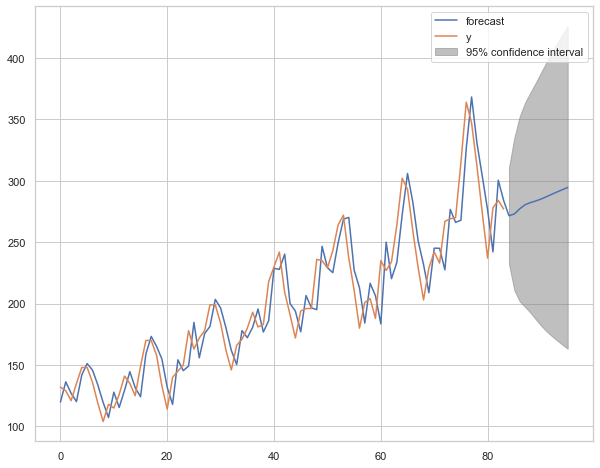

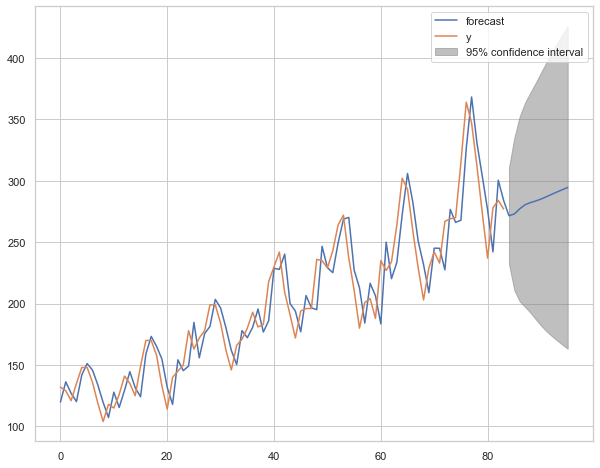

In [44]:
# fit model
model = ARIMA(X, order=(3,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1, 96)

In [45]:
#Error on the test data
val=pd.read_excel('validation.xlsx',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

71.93698492463312

# Combine train and test data and build final Model

In [39]:
# fit model
data = pd.read_excel('Airlines+Data.xlsx', header=0, index_col=0, parse_dates=True)

# prepare data
X = train.values
X = X.astype('float32')

In [40]:
model = ARIMA(X, order = (1,0,1))
model_fit = model.fit()

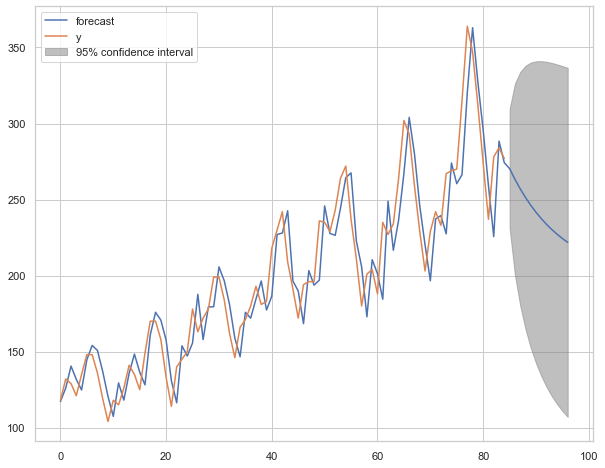

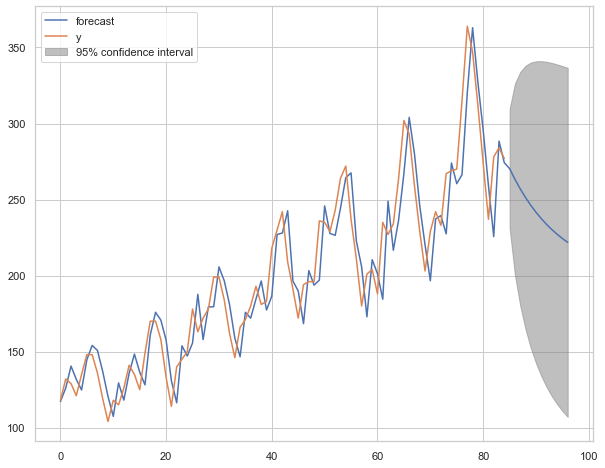

In [41]:
forcast = model_fit.forecast(steps = 10)[0]
model_fit.plot_predict(1,97)

In [42]:
forecast

array([271.54089448, 272.95677742, 277.11773308, 280.41091905,
       282.19310418, 283.48456084, 285.05339862, 286.95225812,
       288.92906011, 290.82856581])